In [1]:
import sys

# Add Robyn to path
sys.path.append("/Users/yijuilee/robynpy_release_reviews/Robyn/python/src")

In [2]:
# Test Pareto Optimizer

from robyn.modeling.pareto.pareto_optimizer import ParetoOptimizer
from robyn.tutorials.utils.data_mapper import import_output_models, import_input_collect, load_data_from_json

2024-11-14 18:40:10,346 - robyn - INFO - Logging is set up to console only.
/Users/yijuilee/robynpy_release_reviews/robynvenv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Load data from JSON
inputCollect = load_data_from_json(
    "/Users/yijuilee/project_robyn/original/Robyn_original_2/Robyn/robyn_api/data/Pareto_InputCollect.json"
)
outputModel = load_data_from_json(
    "/Users/yijuilee/project_robyn/original/Robyn_original_2/Robyn/robyn_api/data/Pareto_OutputModels.json"
)
input_collect = import_input_collect(inputCollect)
output_models = import_output_models(outputModel)

Rolling Window Start Index: 6
Rolling Window End Index: 162
Debug: R output data keys: ['trial1', 'trial2', 'trial3', 'trial4', 'trial5']
Data for trial1: Keys = ['resultCollect', 'hyperBoundNG', 'hyperBoundFixed']
Debug: resultCollect keys for trial1: ['resultHypParam', 'xDecompAgg', 'liftCalibration', 'decompSpendDist', 'iter', 'elapsed.min']
Debug: Sample resultHypParam for trial1: [{'facebook_S_alphas': 1.98202923325, 'facebook_S_gammas': 0.58424338159, 'facebook_S_thetas': 0.09072730547999999, 'newsletter_alphas': 1.7514167265, 'newsletter_gammas': 0.6585122811199999, 'newsletter_thetas': 0.22826231587, 'ooh_S_alphas': 1.9350874957500002, 'ooh_S_gammas': 0.80499137605, 'ooh_S_thetas': 0.26847073588000003, 'print_S_alphas': 1.3471347205000002, 'print_S_gammas': 0.6602001640299999, 'print_S_thetas': 0.34398200833000003, 'search_S_alphas': 1.835435262, 'search_S_gammas': 0.6915214566899999, 'search_S_thetas': 0.11253588111, 'tv_S_alphas': 1.71477961025, 'tv_S_gammas': 0.6107644945299

In [4]:
mmm_data = input_collect["mmm_data"]
# display(mmm_data.data.head())
# Display Model Outputs

output_models = output_models
# display((model_outputs.trials[0].result_hyp_param))

hyperparameters = input_collect["hyperparameters"]
# display(hyperparameters)

featurized_mmm_data = input_collect["featurized_mmm_data"]

holidays_data = input_collect["holidays_data"]

In [5]:
# Add after model training
print("Model Output Summary:")
print(f"Number of trials: {len(output_models.trials)}")
print(f"Average models per trial: {len(output_models.all_result_hyp_param) / len(output_models.trials)}")
print(f"Total unique models: {len(output_models.all_result_hyp_param['sol_id'].unique())}")

print("\nMetrics Distribution:")
metrics_df = output_models.all_result_hyp_param[["nrmse", "decomp.rssd", "mape"]]
print(metrics_df.describe())

# Additional validation to debug model output
print("\nColumns in result_hyp_param:")
print(output_models.all_result_hyp_param.columns.tolist())

print("\nSample rows of metrics:")
print(output_models.all_result_hyp_param[["sol_id", "nrmse", "decomp.rssd", "mape"]].head())

# Show shape of result dataframes
print("\nDataFrame Shapes:")
print(f"result_hyp_param: {output_models.all_result_hyp_param.shape}")
print(f"x_decomp_agg: {output_models.all_x_decomp_agg.shape}")
print(f"decomp_spend_dist: {output_models.all_decomp_spend_dist.shape}")

Model Output Summary:
Number of trials: 5
Average models per trial: 2007.0
Total unique models: 10035

Metrics Distribution:
              nrmse   decomp.rssd          mape
count  10035.000000  10035.000000  10035.000000
mean       0.285779      0.628863    176.847461
std        0.067437      0.083541    167.500223
min        0.085069      0.369959      0.812119
25%        0.242605      0.565598     87.377313
50%        0.264548      0.631424    115.026803
75%        0.301364      0.696620    182.792278
max        0.521505      0.873183   1129.896150

Columns in result_hyp_param:
['facebook_S_alphas', 'facebook_S_gammas', 'facebook_S_thetas', 'newsletter_alphas', 'newsletter_gammas', 'newsletter_thetas', 'ooh_S_alphas', 'ooh_S_gammas', 'ooh_S_thetas', 'print_S_alphas', 'print_S_gammas', 'print_S_thetas', 'search_S_alphas', 'search_S_gammas', 'search_S_thetas', 'tv_S_alphas', 'tv_S_gammas', 'tv_S_thetas', 'train_size', 'rsq_train', 'rsq_val', 'rsq_test', 'nrmse_train', 'nrmse_val', 'nrm

In [6]:
# 3. Create ParetoOptimizer instance
pareto_optimizer = ParetoOptimizer(mmm_data, output_models, hyperparameters, featurized_mmm_data, holidays_data)

In [7]:
# 4. Run optimize function
pareto_result = pareto_optimizer.optimize(pareto_fronts="auto", min_candidates=100)

2024-11-14 18:40:15 [INFO] Starting Pareto optimization
2024-11-14 18:40:15 [INFO] Starting model data aggregation
2024-11-14 18:40:15 [INFO] Computing Pareto fronts
2024-11-14 18:40:16 [INFO] Pareto front computation completed
2024-11-14 18:40:16 [INFO] Preparing Pareto data
2024-11-14 18:40:16 [INFO] Number of Pareto-optimal solutions found: 637
2024-11-14 18:40:16 [INFO] Selected 10 Pareto-fronts containing 102 candidates
2024-11-14 18:40:16 [INFO] Filtering data for selected Pareto fronts...
2024-11-14 18:40:16 [INFO] Calculating response curves for 510 models' media variables...
Processing rows: 100%|██████████| 510/510 [00:05<00:00, 100.64it/s]
2024-11-14 18:40:23 [INFO] Successfully processed 510 response curves
2024-11-14 18:40:23 [INFO] Computing final metrics...
2024-11-14 18:40:23 [INFO] Calculating ROI and CPA metrics...
2024-11-14 18:40:23 [INFO] Starting plot data generation...
2024-11-14 18:40:23 [INFO] Processing Pareto front 1
2024-11-14 18:40:23 [INFO] Pareto-Front: 1

In [8]:
pareto_result.plot_data_collect

{'2_197_8': {'plot1data': {'plotMediaShareLoopBar':            rn     nrmse  decomp.rssd  rsq_train      variable     value
   0        tv_S  0.108185     0.452288   0.938282   spend_share  0.206047
   1       ooh_S  0.108185     0.452288   0.938282   spend_share  0.655151
   2     print_S  0.108185     0.452288   0.938282   spend_share  0.047837
   3  facebook_S  0.108185     0.452288   0.938282   spend_share  0.026563
   4    search_S  0.108185     0.452288   0.938282   spend_share  0.064401
   5        tv_S  0.108185     0.452288   0.938282  effect_share  0.257470
   6       ooh_S  0.108185     0.452288   0.938282  effect_share  0.353539
   7     print_S  0.108185     0.452288   0.938282  effect_share  0.117501
   8  facebook_S  0.108185     0.452288   0.938282  effect_share  0.000000
   9    search_S  0.108185     0.452288   0.938282  effect_share  0.271490,
   'plotMediaShareLoopLine':             rn     nrmse  decomp.rssd  rsq_train   variable     value
   10        tv_S  0.10818

In [9]:
# 5. Check results
print("Pareto Optimization Results:")
print(f"Number of Pareto fronts: {pareto_result.pareto_solutions}")
print(f"MediaVecCollect: {pareto_result.media_vec_collect.shape, pareto_result.media_vec_collect}")
print("\Hyper parameter solutions:")
print(pareto_result.result_hyp_param)

print("\nAggregated decomposition results:")
print(pareto_result.x_decomp_agg)
print("\result Calibration:")
print(pareto_result.result_calibration)
print("\nx Decomp Vec Collect:")
print(pareto_result.x_decomp_vec_collect.shape, pareto_result.x_decomp_vec_collect)
print("\nCarryover percentage all:")
print(pareto_result.df_caov_pct_all.shape, pareto_result.df_caov_pct_all)
print("\Plot Data Collected")
# print("NUMBER OF PLOTS Data collected for:", len(pareto_result.plot_data_collect["2_4_8"]))
# print("Plot data for solid 3_206_6", pareto_result.plot_data_collect["2_4_8"])

# 6. Validate logic
assert pareto_result.pareto_fronts == "auto" or isinstance(
    pareto_result.pareto_fronts, int
), "Invalid pareto_fronts value"
assert not pareto_result.result_hyp_param.empty, "Empty result_hyp_param DataFrame"
assert not pareto_result.x_decomp_agg.empty, "Empty x_decomp_agg DataFrame"

print("\nAll assertions passed. The optimize function is working as expected.")

Pareto Optimization Results:
Number of Pareto fronts: {'3_123_1', '2_221_5', '2_85_3', '3_109_9', '3_221_6', '2_97_3', '1_65_6', '3_219_3', '3_194_5', '3_131_1', '2_100_6', '2_208_2', '5_222_1', '5_221_9', '3_147_7', '1_217_2', '3_216_9', '2_101_9', '2_95_3', '3_186_4', '3_201_2', '3_108_7', '2_93_9', '3_115_4', '3_95_4', '3_114_4', '2_215_9', '2_207_8', '2_170_8', '3_144_4', '3_214_7', '3_98_7', '1_150_3', '5_109_5', '2_218_4', '2_198_9', '3_85_4', '3_158_7', '3_77_7', '3_174_4', '2_178_6', '3_81_1', '3_197_5', '5_221_5', '2_87_4', '3_138_7', '4_129_2', '3_204_9', '2_217_6', '3_66_5', '3_211_6', '3_214_9', '5_220_8', '2_221_2', '1_166_9', '3_127_7', '3_200_1', '3_197_8', '1_208_4', '5_80_5', '3_74_4', '2_220_1', '3_75_4', '3_78_9', '4_105_5', '3_78_7', '3_71_1', '2_218_2', '5_193_3', '3_102_1', '1_160_3', '2_214_8', '5_117_1', '5_196_6', '2_218_3', '3_218_3', '3_91_1', '2_204_9', '3_204_5', '3_210_4', '4_98_8', '3_171_1', '2_198_3', '3_82_3', '3_196_4', '3_104_4', '3_162_1', '2_221_6'

# Allocator

In [10]:
## Step 1: Setup and Import

# Import necessary Robyn classes
from robyn.allocator.entities.enums import OptimizationScenario, ConstrMode
from robyn.allocator.budget_allocator import BudgetAllocator
from robyn.allocator.entities.allocation_config import AllocationConfig
from robyn.allocator.entities.allocation_constraints import AllocationConstraints
from robyn.visualization.allocator_plotter import AllocationPlotter
%load_ext autoreload
%autoreload 2

In [11]:
# Make sure to use the correct model ID from your pareto results
available_models = pareto_result.result_hyp_param["sol_id"].unique()  # or 'solID' if that's the column name
print(f"Available models: {available_models}")
# Initialize allocator with a valid model ID
select_model = available_models[0]  # Use first available model

# Initialize budget allocator
allocator = BudgetAllocator(
    mmm_data=mmm_data,
    featurized_mmm_data=featurized_mmm_data,
    model_outputs=output_models,
    pareto_result=pareto_result,  # Get ParetoResult from import_output_collect()
    select_model=select_model,
)

2024-11-14 18:40:38,703 - robyn.allocator.budget_allocator - INFO - Initializing BudgetAllocator
2024-11-14 18:40:38,703 - robyn.allocator.media_response - INFO - Initializing MediaResponseParamsCalculator
2024-11-14 18:40:38,704 - robyn.allocator.allocation_optimizer - INFO - Initializing AllocationOptimizer
2024-11-14 18:40:38,704 - robyn.allocator.media_response - INFO - Starting media response parameters calculation for model 1_1_1
2024-11-14 18:40:38,769 - robyn.allocator.media_response - INFO - Successfully calculated media response parameters: MediaResponseParameters(alphas=5 channels, inflexions=5 channels, coefficients=5 channels)
2024-11-14 18:40:38,769 - robyn.allocator.budget_allocator - INFO - BudgetAllocator initialization completed successfully


Available models: ['1_1_1' '1_1_2' '1_1_3' ... '5_223_7' '5_223_8' '5_223_9']


In [12]:
# Create base constraints matching R example
channel_constraints = AllocationConstraints(
    channel_constr_low={
        "tv_S": 0.7,  # -30% from base
        "ooh_S": 0.7,
        "print_S": 0.7,
        "facebook_S": 0.7,
        "search_S": 0.7,
    },
    channel_constr_up={
        "tv_S": 1.2,  # +20% from base
        "ooh_S": 1.5,  # +50% from base
        "print_S": 1.5,
        "facebook_S": 1.5,
        "search_S": 1.5,
    },
    channel_constr_multiplier=3.0,
)

# Configure max response scenario
max_response_config = AllocationConfig(
    scenario=OptimizationScenario.MAX_RESPONSE,
    constraints=channel_constraints,
    date_range="last",  # Use last period as initial
    total_budget=None,  # Use historical budget
    maxeval=100000,
    optim_algo="SLSQP_AUGLAG",
    constr_mode=ConstrMode.EQUALITY,
    plots=True,
)

# Run optimization
result = allocator.allocate(max_response_config)

# Print results
print(
    f"""
Model ID: {select_model}
Scenario: {max_response_config.scenario}
Use case: {result.metrics.get('use_case', '')}
Window: {result.metrics.get('date_range_start')}:{result.metrics.get('date_range_end')} ({result.metrics.get('n_periods')} {mmm_data.mmmdata_spec.interval_type})

Dep. Variable Type: {mmm_data.mmmdata_spec.dep_var_type}
Media Skipped: {result.metrics.get('skipped_channels', 'None')}
Relative Spend Increase: {result.metrics.get('spend_lift_pct', 0):.1f}% ({result.metrics.get('spend_lift_abs', 0):+.0f}K)
Total Response Increase (Optimized): {result.metrics.get('response_lift', 0)*100:.1f}%

Allocation Summary:
"""
)

# Print channel-level results
for channel in mmm_data.mmmdata_spec.paid_media_spends:
    current = result.optimal_allocations[result.optimal_allocations["channel"] == channel].iloc[0]

    print(
        f"""
- {channel}:
  Optimizable bound: [{(current['constr_low']-1)*100:.0f}%, {(current['constr_up']-1)*100:.0f}%],
  Initial spend share: {current['current_spend_share']*100:.2f}% -> Optimized bounded: {current['optimal_spend_share']*100:.2f}%
  Initial response share: {current['current_response_share']*100:.2f}% -> Optimized bounded: {current['optimal_response_share']*100:.2f}%
  Initial abs. mean spend: {current['current_spend']/1000:.3f}K -> Optimized: {current['optimal_spend']/1000:.3f}K [Delta = {(current['optimal_spend']/current['current_spend']-1)*100:.0f}%]
"""
    )

2024-11-14 18:40:38,789 - robyn.allocator.budget_allocator - INFO - Starting budget allocation optimization
2024-11-14 18:40:38,792 - robyn.allocator.budget_allocator - WARNING - Found zero mean spend for channels: ['tv_S' 'ooh_S' 'print_S' 'search_S']
2024-11-14 18:40:38,793 - robyn.allocator.response_calculator - INFO - Successfully calculated gradient value: -0.0668
2024-11-14 18:40:38,794 - robyn.allocator.response_calculator - INFO - Successfully calculated gradient value: -0.0008
2024-11-14 18:40:38,794 - robyn.allocator.response_calculator - INFO - Successfully calculated gradient value: -0.8458
2024-11-14 18:40:38,794 - robyn.allocator.response_calculator - INFO - Successfully calculated gradient value: -2.8388
2024-11-14 18:40:38,794 - robyn.allocator.response_calculator - INFO - Successfully calculated gradient value: -2.6607
2024-11-14 18:40:38,795 - robyn.allocator.budget_allocator - INFO - Initial metrics calculated successfully
2024-11-14 18:40:38,795 - robyn.allocator.bu


Model ID: 1_1_1
Scenario: max_response
Use case: 
Window: 2019-11-11 00:00:00:2019-11-11 00:00:00 (1 week)

Dep. Variable Type: revenue
Media Skipped: None
Relative Spend Increase: 0.0% (+0K)
Total Response Increase (Optimized): 5.7%

Allocation Summary:


- tv_S:
  Optimizable bound: [-30%, 20%],
  Initial spend share: 7.14% -> Optimized bounded: 5.00%
  Initial response share: 0.09% -> Optimized bounded: 0.05%
  Initial abs. mean spend: 1.221K -> Optimized: 0.854K [Delta = -30%]


- ooh_S:
  Optimizable bound: [-30%, 50%],
  Initial spend share: 7.14% -> Optimized bounded: 5.00%
  Initial response share: 0.00% -> Optimized bounded: 0.00%
  Initial abs. mean spend: 1.221K -> Optimized: 0.854K [Delta = -30%]


- print_S:
  Optimizable bound: [-30%, 50%],
  Initial spend share: 7.14% -> Optimized bounded: 5.00%
  Initial response share: 1.50% -> Optimized bounded: 0.89%
  Initial abs. mean spend: 1.221K -> Optimized: 0.854K [Delta = -30%]


- facebook_S:
  Optimizable bound: [-30%, 50%

In [13]:
### Scenario 3: Default Target Efficiency (Target ROAS or CPA)
print("\nScenario 3: Target efficiency optimization")

# Create constraints matching R's implementation
default_channel_constraints = AllocationConstraints(
    channel_constr_low={
        channel: 0.1 for channel in mmm_data.mmmdata_spec.paid_media_spends  # -90% from base for all channels
    },
    channel_constr_up={
        channel: 10.0 for channel in mmm_data.mmmdata_spec.paid_media_spends  # +900% from base for all channels
    },
    channel_constr_multiplier=1.0,  # Don't extend bounds for target efficiency
    is_target_efficiency=True,  # Flag this as target efficiency scenario
)

# Create configuration for target efficiency scenario
target_efficiency_config = AllocationConfig(
    scenario=OptimizationScenario.TARGET_EFFICIENCY,
    constraints=default_channel_constraints,
    date_range="all",  # Use all dates like in R version
    target_value=None,  # Will use default 80% of initial ROAS or 120% of initial CPA
    maxeval=100000,
    optim_algo="SLSQP_AUGLAG",
    constr_mode=ConstrMode.EQUALITY,
    plots=True,
)

# Run optimization
result3 = allocator.allocate(target_efficiency_config)

# Print results matching R format
print(
    f"""
Model ID: {select_model}
Scenario: {target_efficiency_config.scenario}
Use case: {result3.metrics.get('use_case', '')}
Window: {result3.metrics.get('date_range_start')}:{result3.metrics.get('date_range_end')} ({result3.metrics.get('n_periods')} {mmm_data.mmmdata_spec.interval_type})

Dep. Variable Type: {mmm_data.mmmdata_spec.dep_var_type}
Media Skipped: {result3.metrics.get('skipped_channels', 'None')}
Relative Spend Increase: {result3.metrics.get('spend_lift_pct', 0):.0f}% ({result3.metrics.get('spend_lift_abs', 0):.0f})
Total Response Increase (Optimized): {result3.metrics.get('response_lift', 0)*100:.0f}%

Allocation Summary:
"""
)

# Print channel-level results
for channel in mmm_data.mmmdata_spec.paid_media_spends:
    current = result3.optimal_allocations[result3.optimal_allocations["channel"] == channel].iloc[0]

    print(
        f"""
- {channel}:
  Optimizable bound: [{(current['constr_low']-1)*100:.0f}%, {(current['constr_up']-1)*100:.0f}%],
  Initial spend share: {current['current_spend_share']*100:.2f}% -> Optimized bounded: {current['optimal_spend_share']*100:.2f}%
  Initial response share: {current['current_response_share']*100:.2f}% -> Optimized bounded: {current['optimal_response_share']*100:.2f}%
  Initial abs. mean spend: {current['current_spend']/1000:.3f}K -> Optimized: {current['optimal_spend']/1000:.3f}K [Delta = {(current['optimal_spend']/current['current_spend']-1)*100:.0f}%]
"""
    )

2024-11-14 18:40:38,861 - robyn.allocator.budget_allocator - INFO - Starting budget allocation optimization
2024-11-14 18:40:38,864 - robyn.allocator.response_calculator - INFO - Successfully calculated gradient value: -0.3683
2024-11-14 18:40:38,864 - robyn.allocator.response_calculator - INFO - Successfully calculated gradient value: -0.0209
2024-11-14 18:40:38,864 - robyn.allocator.response_calculator - INFO - Successfully calculated gradient value: -1.0808
2024-11-14 18:40:38,865 - robyn.allocator.response_calculator - INFO - Successfully calculated gradient value: -3.6822
2024-11-14 18:40:38,865 - robyn.allocator.response_calculator - INFO - Successfully calculated gradient value: -6.4603
2024-11-14 18:40:38,866 - robyn.allocator.budget_allocator - INFO - Initial metrics calculated successfully
2024-11-14 18:40:38,866 - robyn.allocator.budget_allocator - INFO - Running optimization for scenario: OptimizationScenario.TARGET_EFFICIENCY
2024-11-14 18:40:38,866 - robyn.allocator.budge


Scenario 3: Target efficiency optimization


/Users/yijuilee/robynpy_release_reviews/robynvenv/lib/python3.9/site-packages/scipy/optimize/_slsqp_py.py:437: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)
2024-11-14 18:40:38,962 - robyn.allocator.allocation_optimizer - INFO - Optimization completed successfully
2024-11-14 18:40:38,963 - robyn.allocator.budget_allocator - INFO - Target efficiency optimization completed successfully
2024-11-14 18:40:38,975 - robyn.allocator.budget_allocator - INFO - Response curves generated successfully
2024-11-14 18:40:38,988 - robyn.allocator.budget_allocator - INFO - Response curves generated successfully
2024-11-14 18:40:38,989 - robyn.allocator.budget_allocator - INFO - Budget allocation optimization completed successfully



Model ID: 1_1_1
Scenario: target_efficiency
Use case: all_historical_vec + historical_budget
Window: 2015-11-23 00:00:00:2019-11-11 00:00:00 (208 week)

Dep. Variable Type: revenue
Media Skipped: None
Relative Spend Increase: 856% (598)
Total Response Increase (Optimized): 665%

Allocation Summary:


- tv_S:
  Optimizable bound: [-90%, 900%],
  Initial spend share: 21.25% -> Optimized bounded: 22.22%
  Initial response share: 8.85% -> Optimized bounded: 20.17%
  Initial abs. mean spend: 14.844K -> Optimized: 148.437K [Delta = 900%]


- ooh_S:
  Optimizable bound: [-90%, 900%],
  Initial spend share: 61.87% -> Optimized bounded: 60.13%
  Initial response share: 1.26% -> Optimized bounded: 6.25%
  Initial abs. mean spend: 43.218K -> Optimized: 401.724K [Delta = 830%]


- print_S:
  Optimizable bound: [-90%, 900%],
  Initial spend share: 5.34% -> Optimized bounded: 5.58%
  Initial response share: 8.75% -> Optimized bounded: 8.84%
  Initial abs. mean spend: 3.729K -> Optimized: 37.286K [D

2024-11-14 18:40:39,008 - robyn.visualization.base_visualizer - INFO - Initializing BaseVisualizer with style: bmh
2024-11-14 18:40:39,009 - robyn.visualization.base_visualizer - INFO - BaseVisualizer initialization completed
2024-11-14 18:40:39,009 - robyn.visualization.allocator_plotter - INFO - AllocationPlotter initialized successfully with result: AllocationResult(
Total Current Spend: $17,088.90
Total Optimal Spend: $17,088.90
Spend Lift: +0.0%
Response Lift: +5.7%)
2024-11-14 18:40:39,010 - robyn.visualization.base_visualizer - INFO - Initializing BaseVisualizer with style: bmh
2024-11-14 18:40:39,010 - robyn.visualization.base_visualizer - INFO - BaseVisualizer initialization completed
2024-11-14 18:40:39,011 - robyn.visualization.allocator_plotter - INFO - AllocationPlotter initialized successfully with result: AllocationResult(
Total Current Spend: $69,851.44
Total Optimal Spend: $668,059.33
Spend Lift: +856.4%
Response Lift: +665.1%)
2024-11-14 18:40:39,011 - robyn.visualiza

Max Response Scenario Plots:
--------------------------------------------------


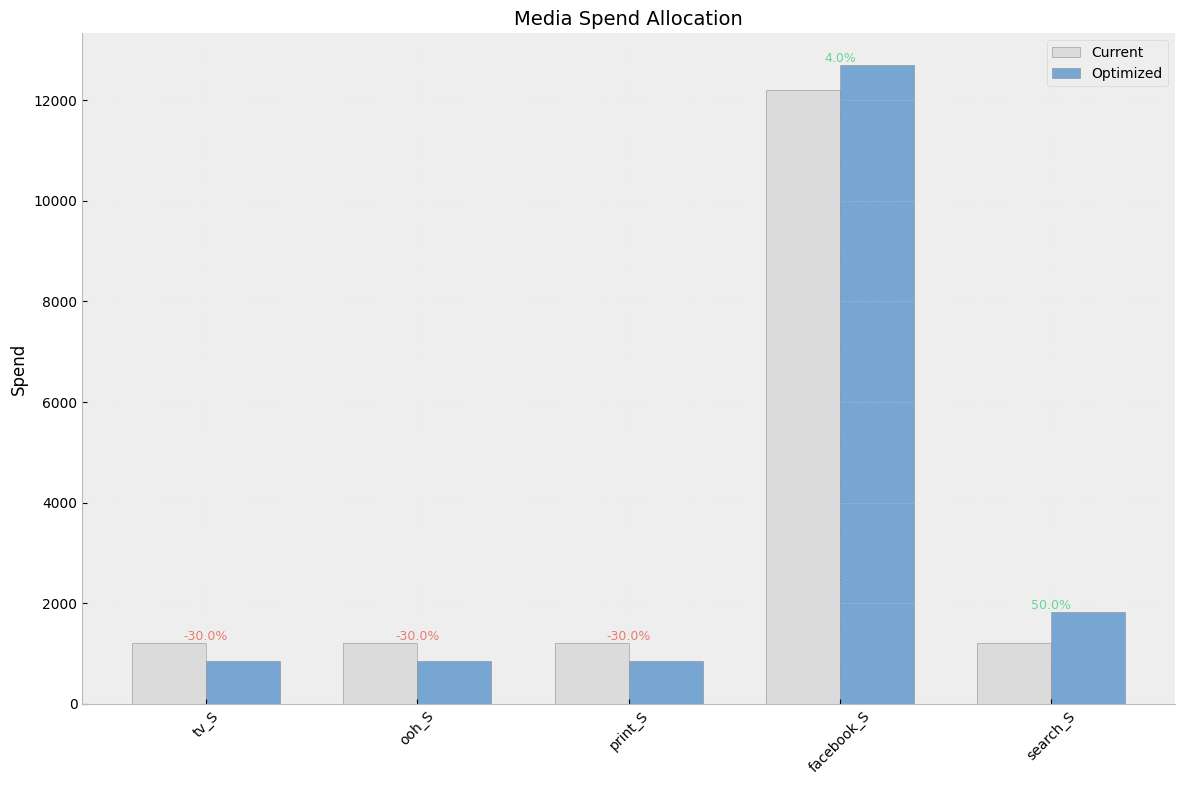

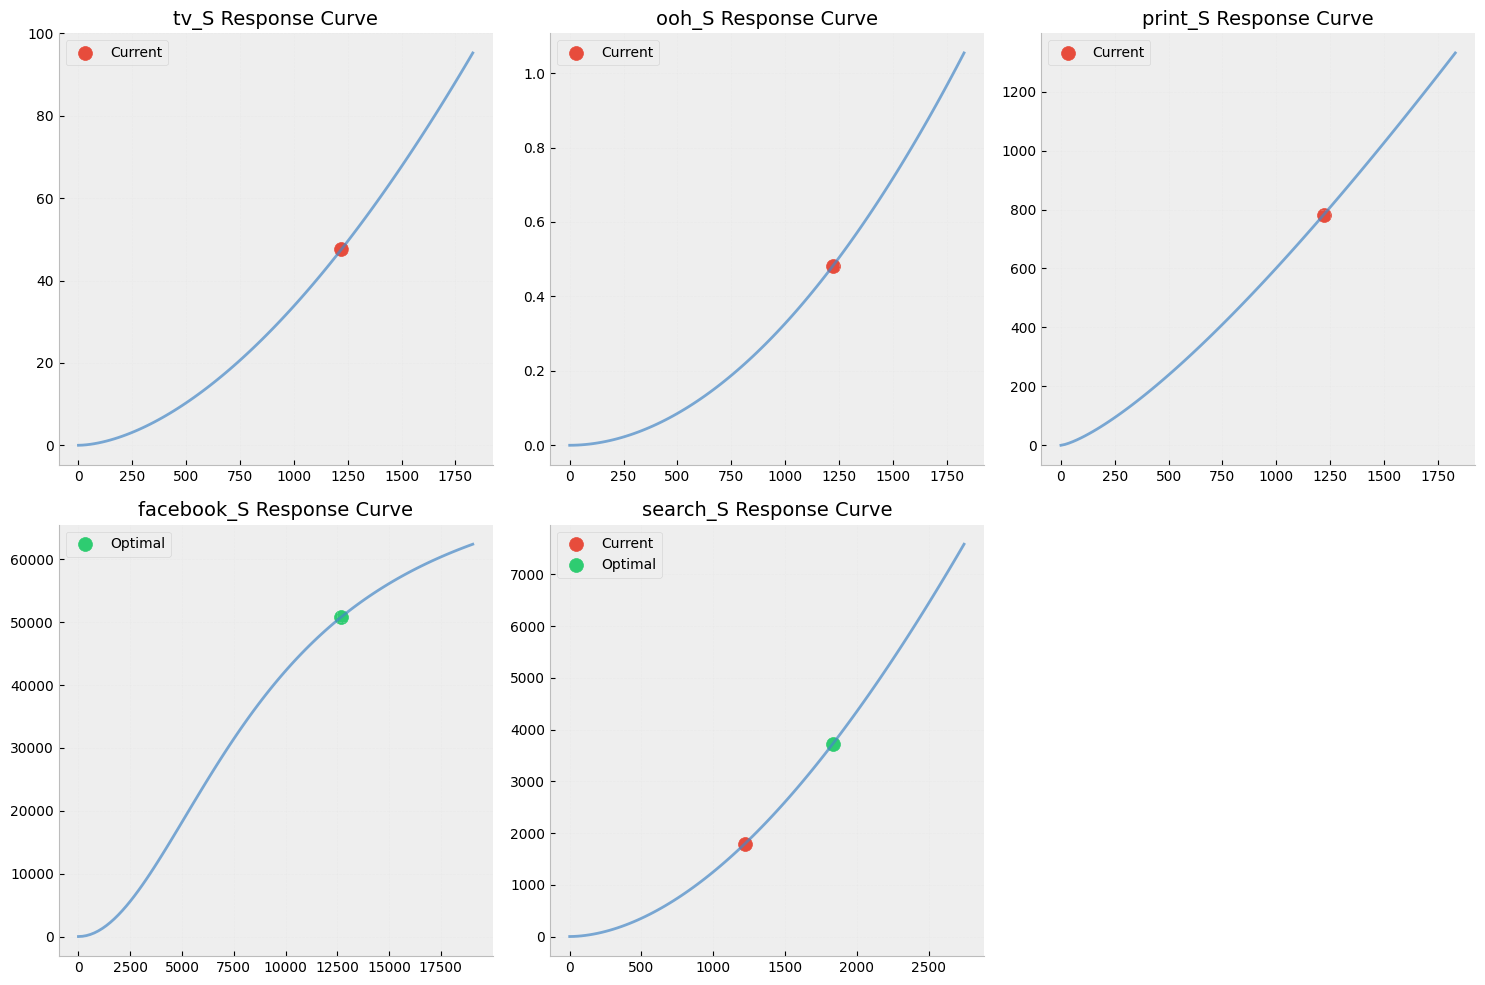

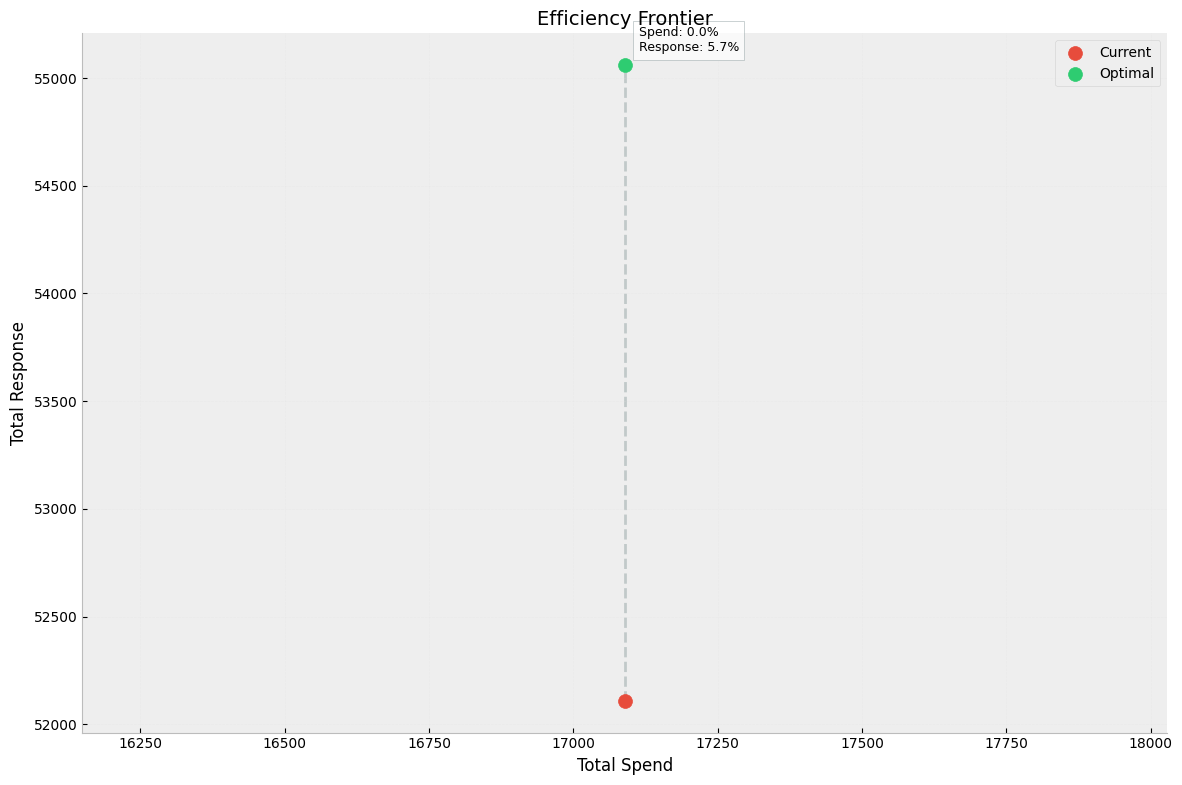

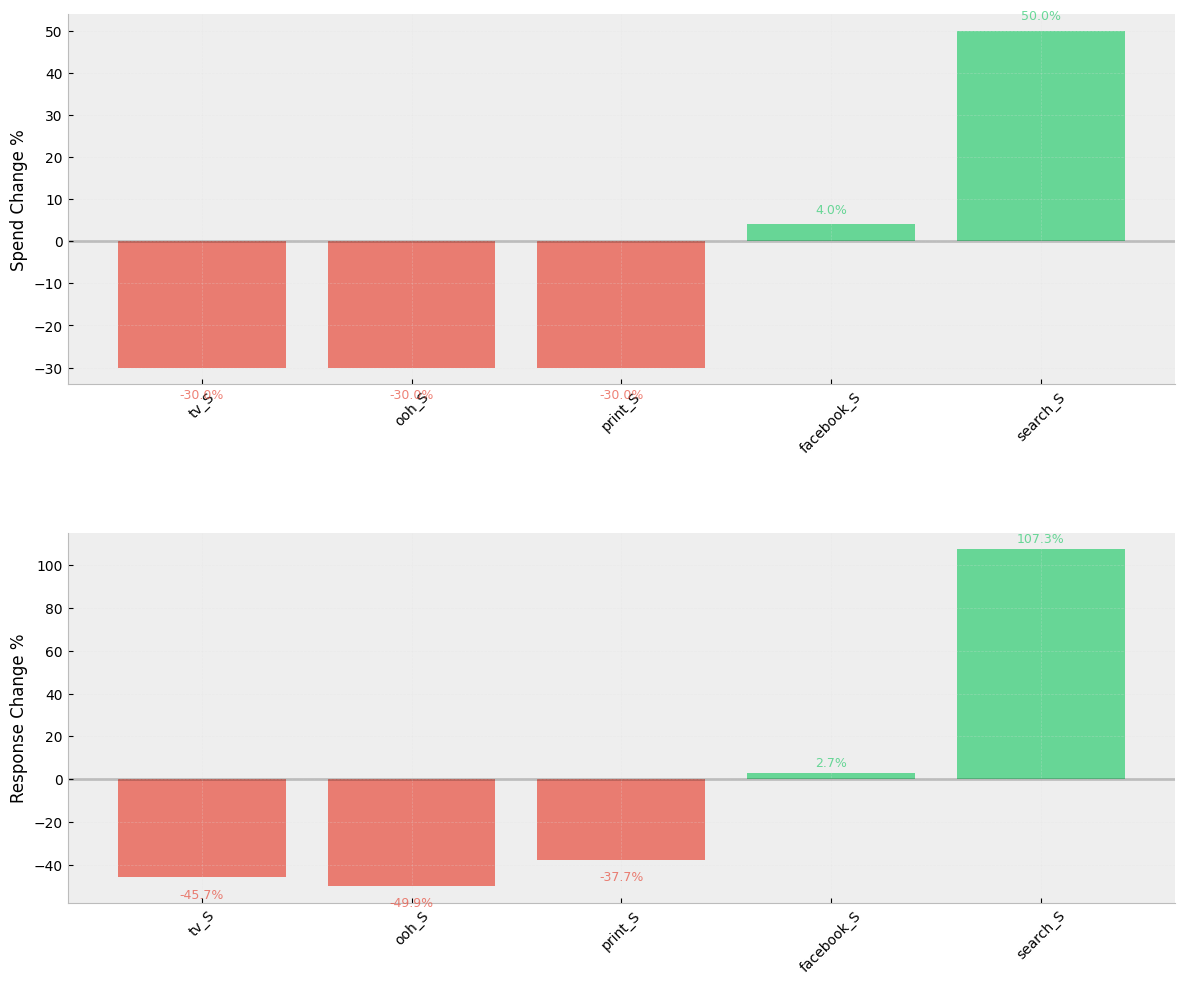

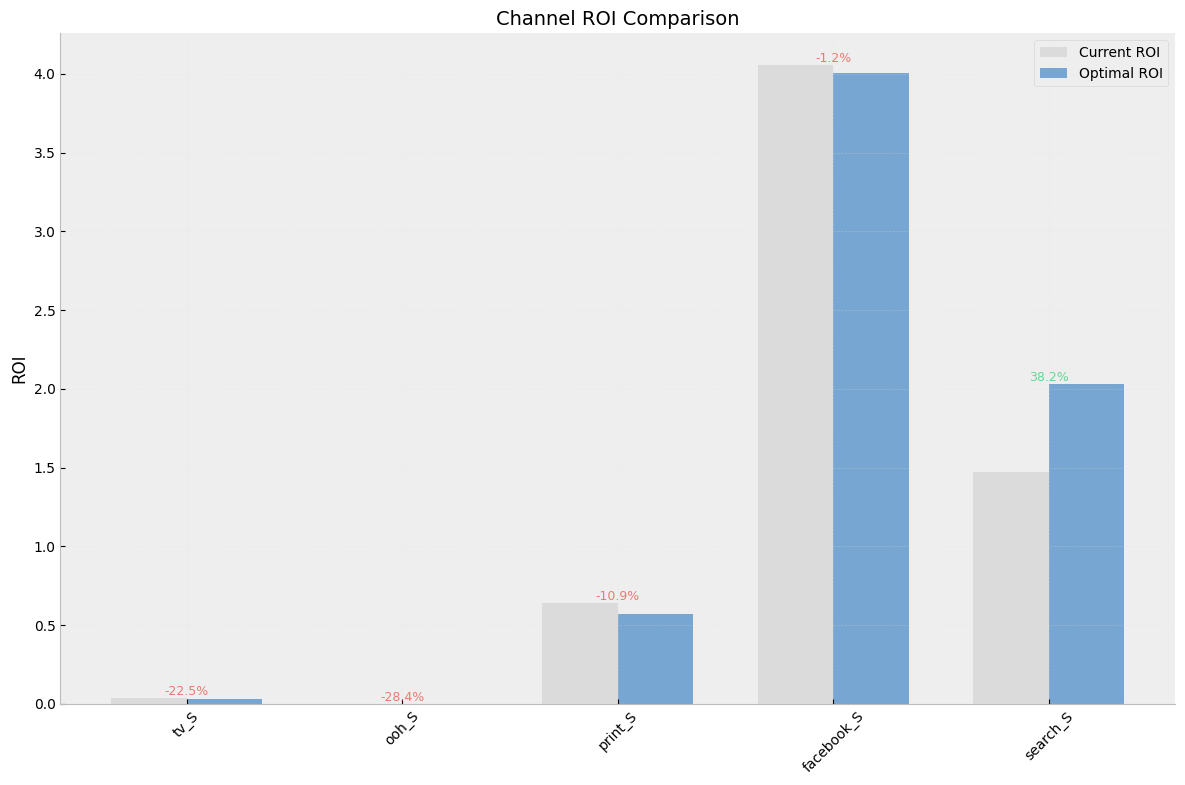


Target Efficiency Scenario Plots:
--------------------------------------------------


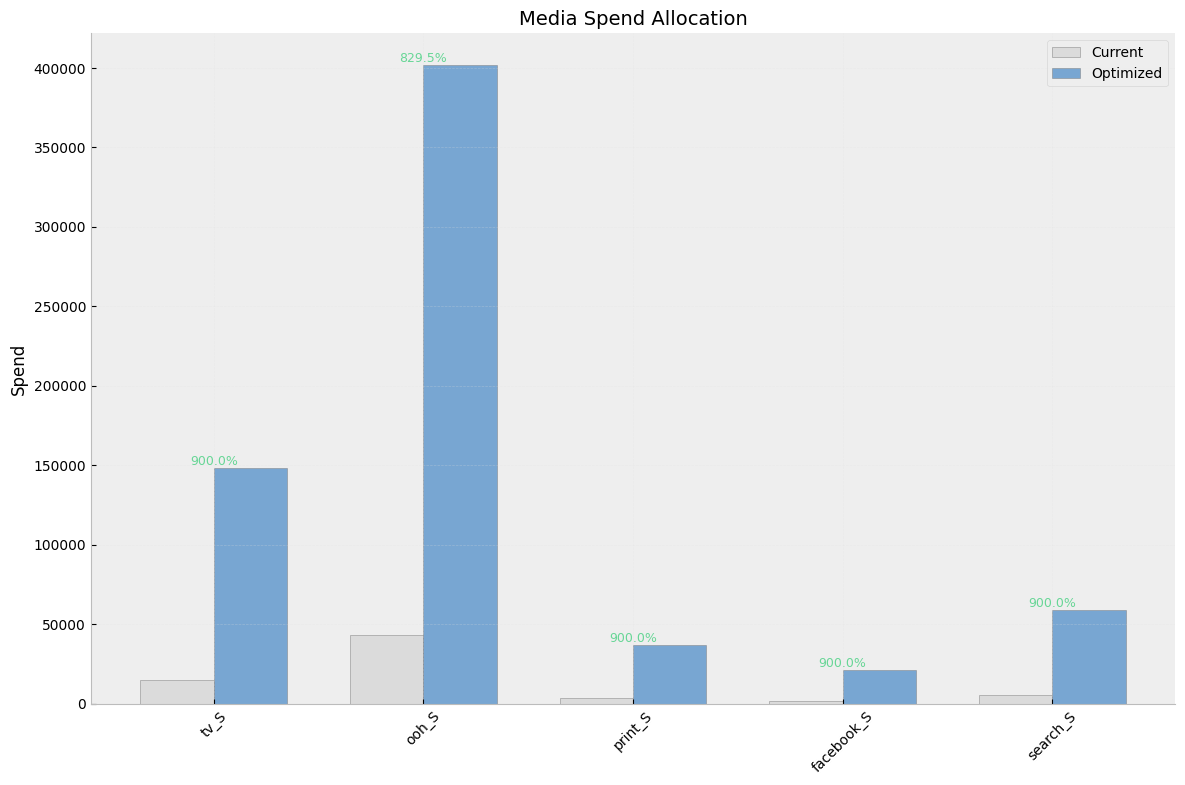

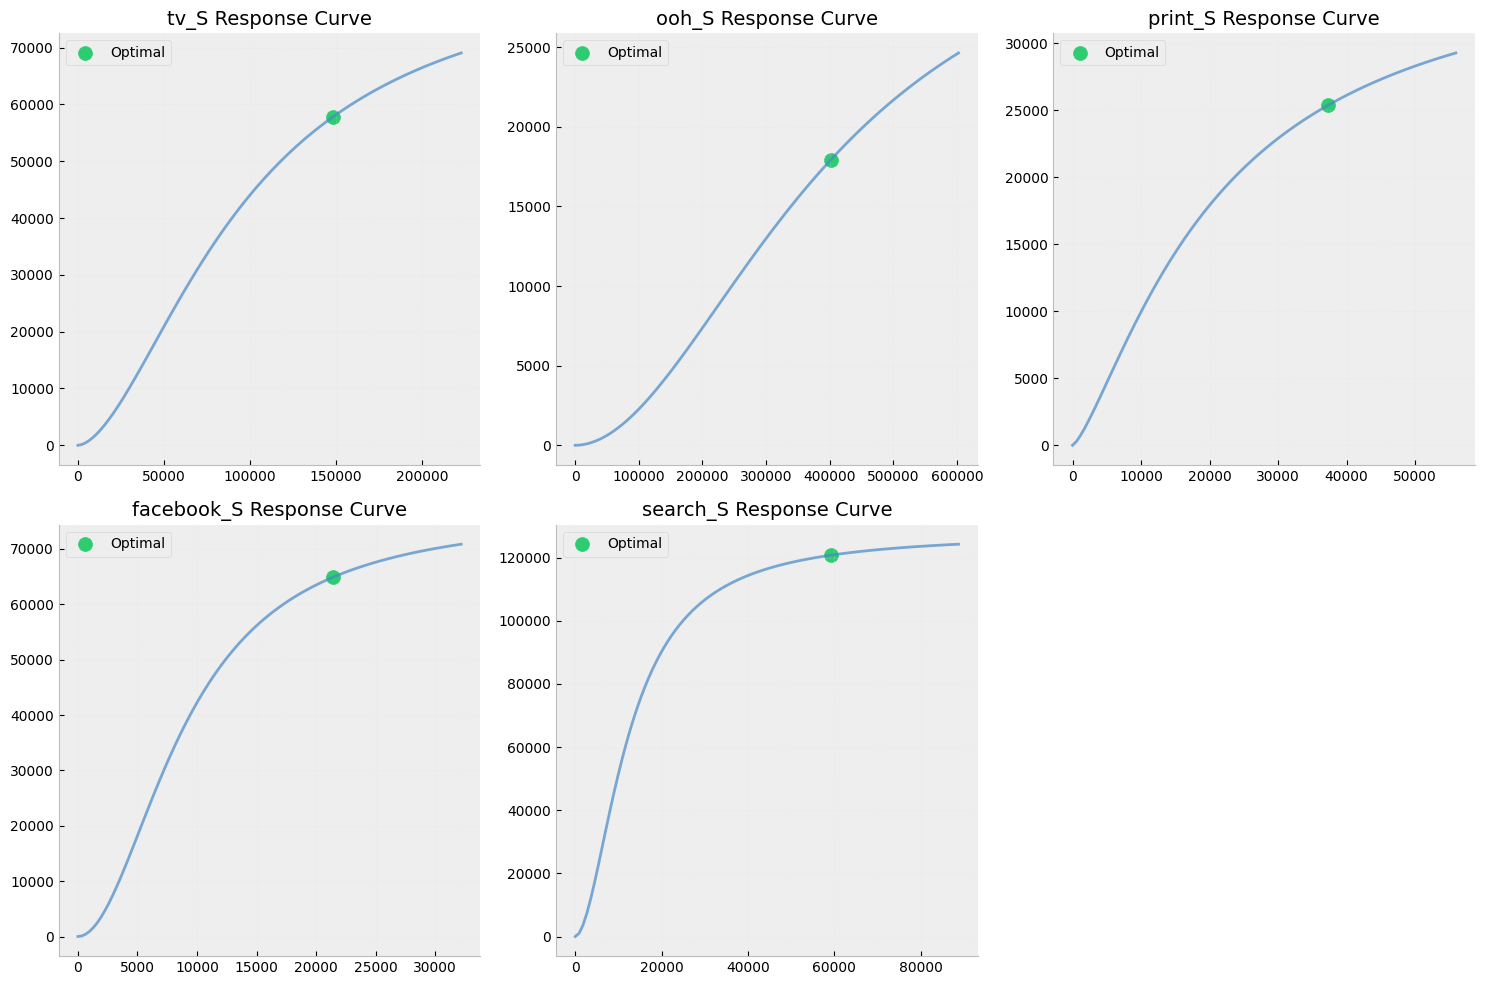

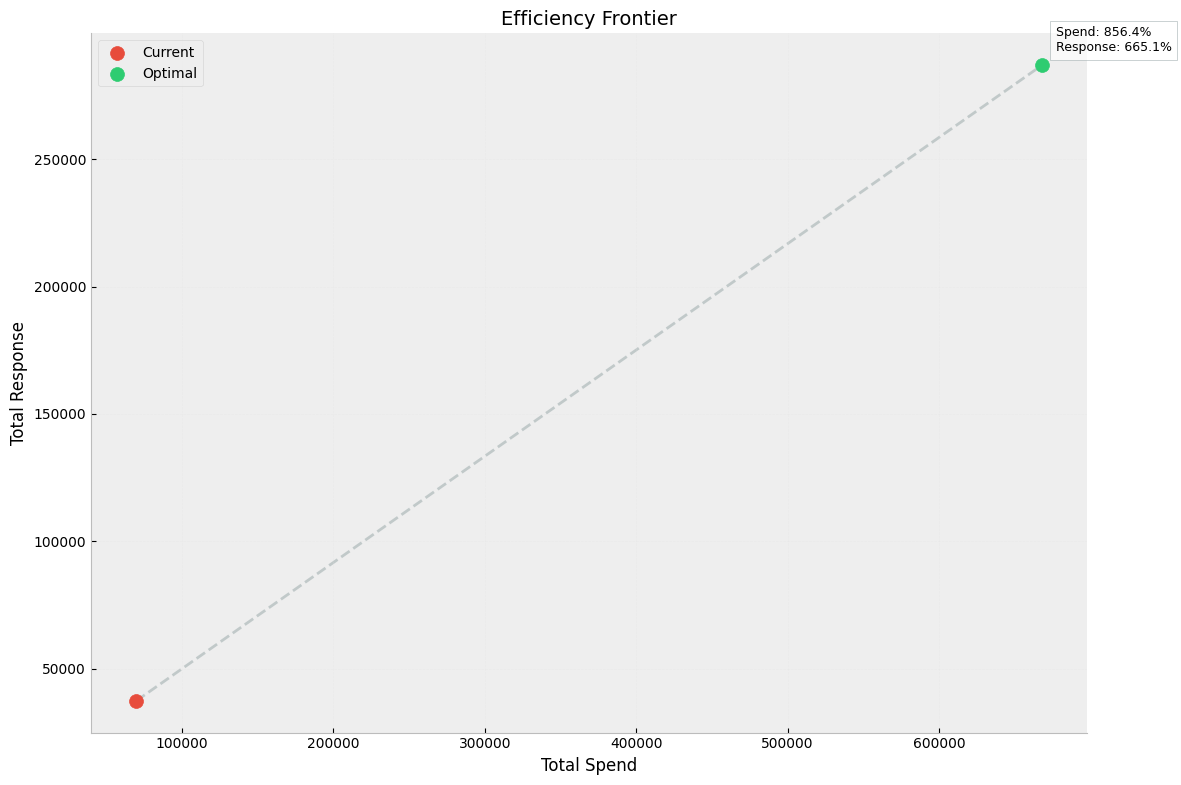

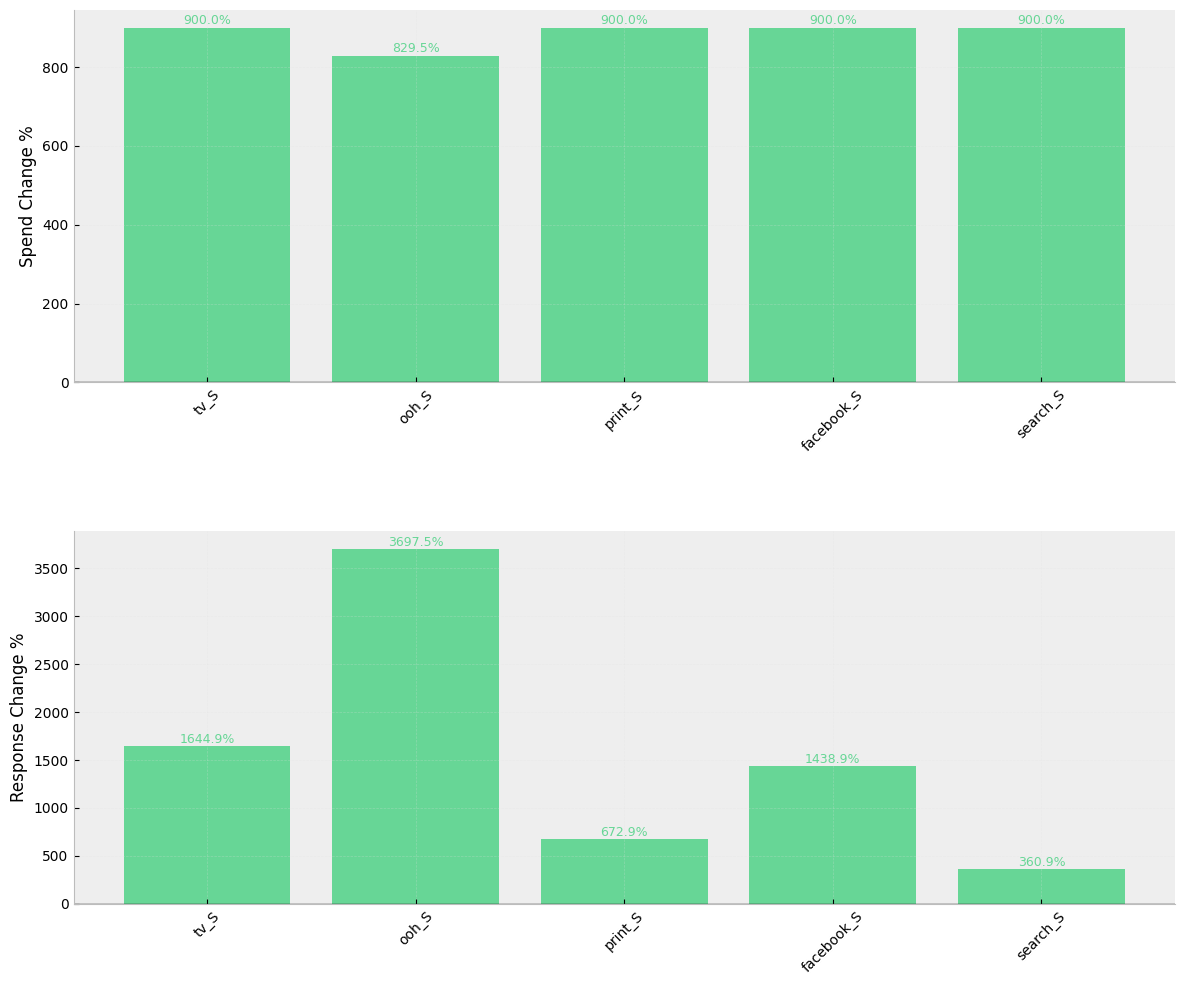

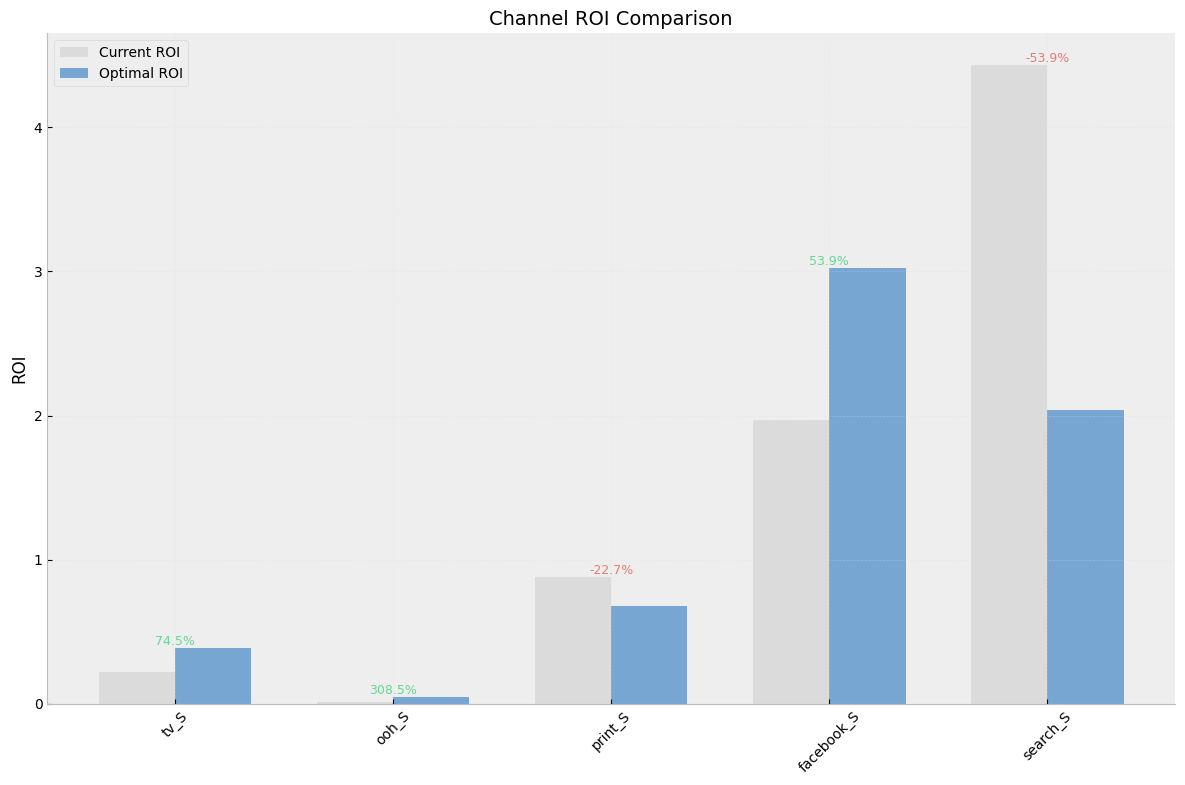

In [14]:
# Create visualizations for each scenario
max_response_plotter = AllocationPlotter(result)
target_efficiency_plotter = AllocationPlotter(result3)

# Generate plots
max_response_plots = max_response_plotter.plot_all()
target_efficiency_plots = target_efficiency_plotter.plot_all()

# Display plots
print("Max Response Scenario Plots:")
print("-" * 50)
for plot_name, fig in max_response_plots.items():
    display(fig)


print("\nTarget Efficiency Scenario Plots:")
print("-" * 50)
for plot_name, fig in target_efficiency_plots.items():
    display(fig)